In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Wine_clust .csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no null values present

In [4]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

Check for outliers

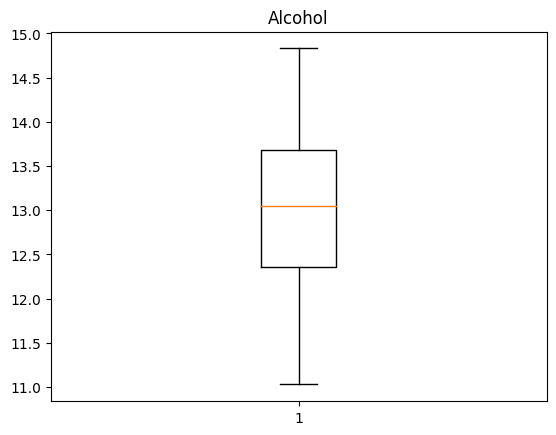

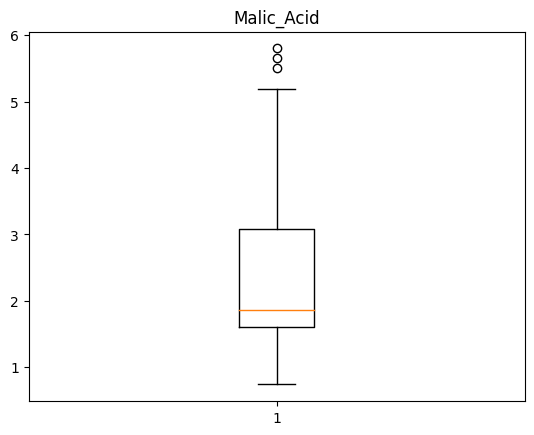

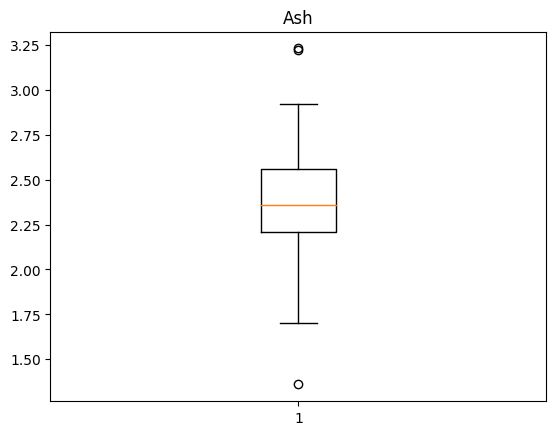

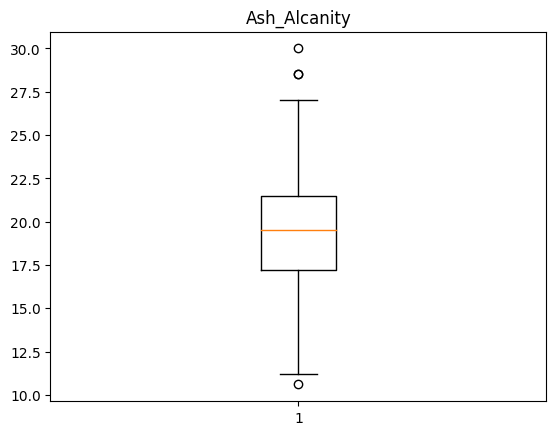

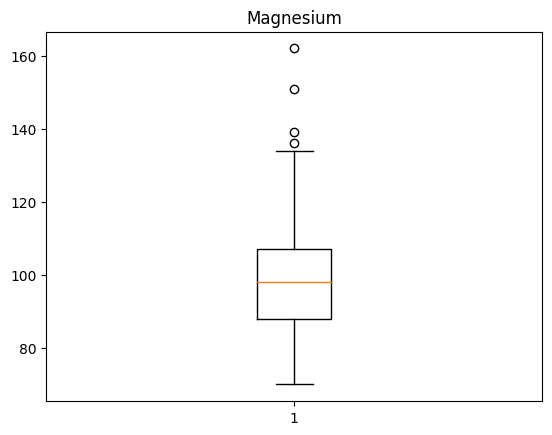

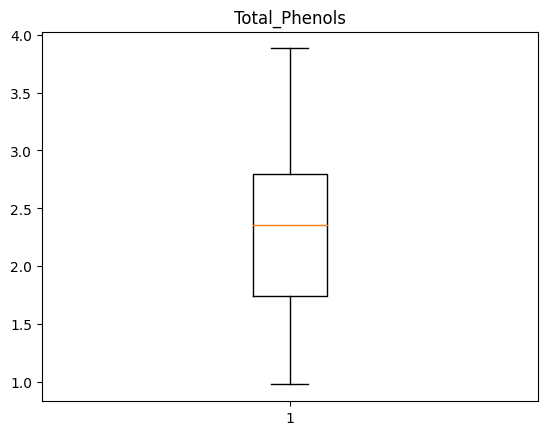

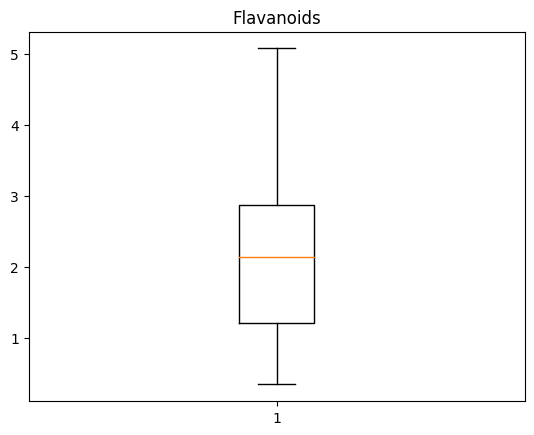

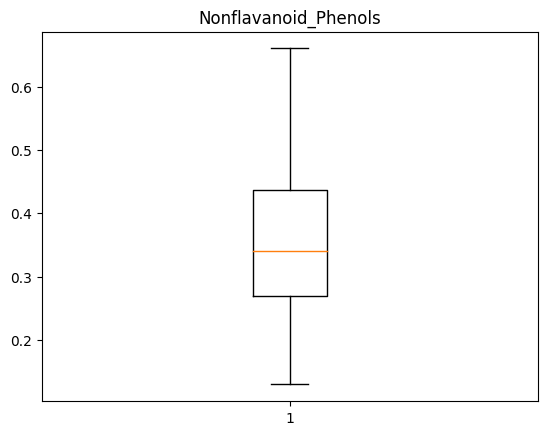

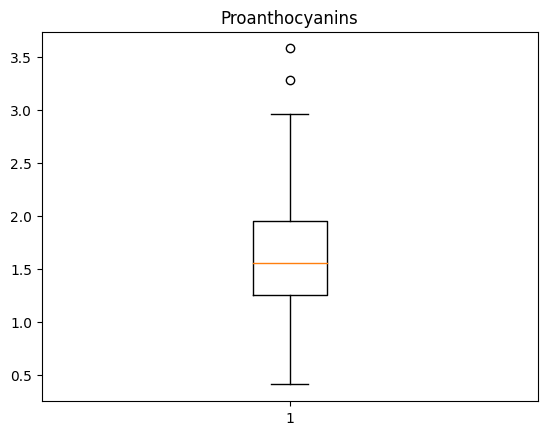

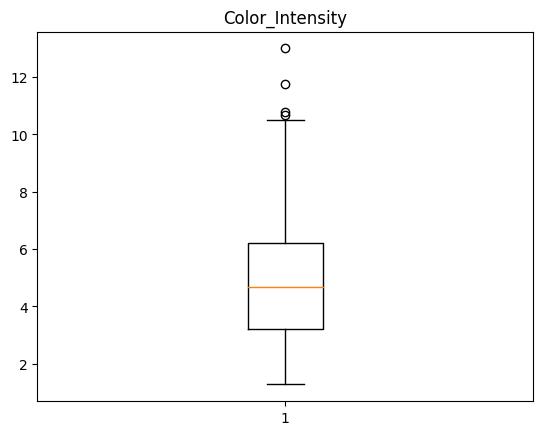

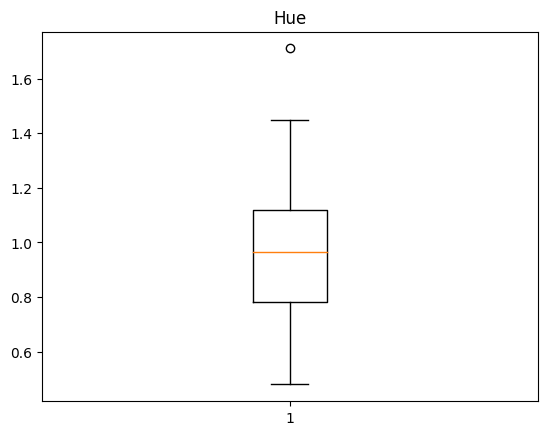

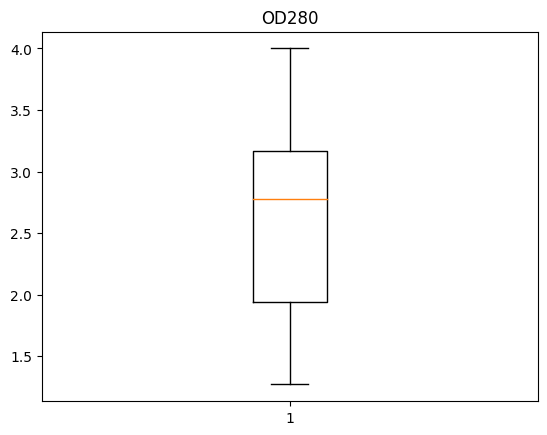

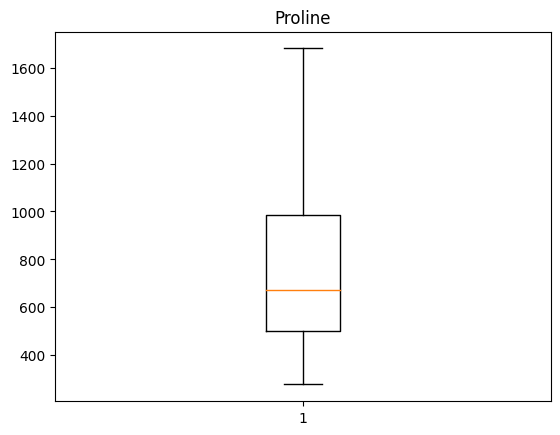

In [6]:
for i in ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']:
       plt.figure()
       plt.boxplot(data[i])
       plt.title(i)

Some outliers are detected

In [ ]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


However describe function says there are no rare values that outstand from normal data set, also PRINCIPAL COMPONENTS will be defined in upcoming steps.

Splitting

In [7]:
X = data

**KMeans**

In [42]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,n_init=20)
  kmeans.fit(X)
  css = kmeans.inertia_
  print('Clusters = ',i,'wcss = ',css)
  wcss.append(css)

Clusters =  1 wcss =  17592296.383508474
Clusters =  2 wcss =  4543749.614531861
Clusters =  3 wcss =  2370689.686782969
Clusters =  4 wcss =  1337029.49294159
Clusters =  5 wcss =  916379.1871539169
Clusters =  6 wcss =  647326.0020260848
Clusters =  7 wcss =  412137.5091004584
Clusters =  8 wcss =  323223.24705426686
Clusters =  9 wcss =  270155.6963730623
Clusters =  10 wcss =  219749.54616616786


**The Elbow curve**

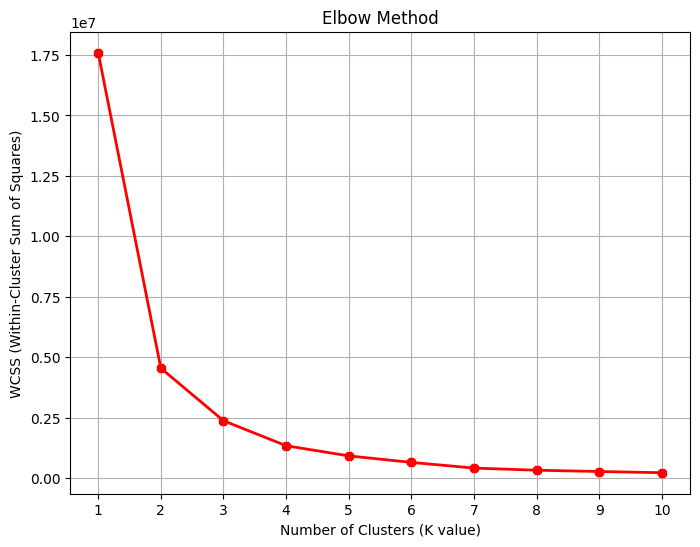

In [43]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K value)')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid()

Taking number of clusters as 3

In [15]:
kmeans = KMeans(n_clusters = 3,n_init = 20)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=20)

In [16]:
cluster_labels = kmeans.predict(X)
cluster_labels

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1], dtype=int32)

**PCA**

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit_transform(X)

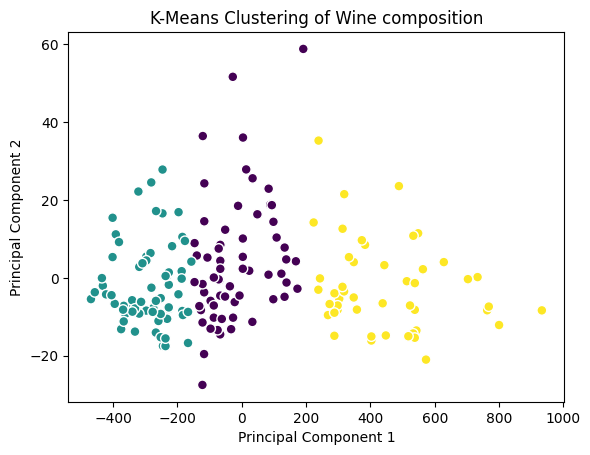

In [19]:
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='w', s=50)
plt.title('K-Means Clustering of Wine composition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
sil_k = silhouette_score(X,cluster_labels)
sil_k


0.571138193786884

**Agglomerative Hierarchical Clustering**

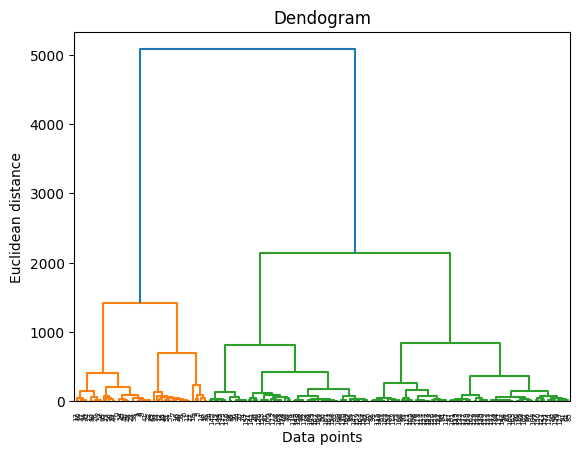

In [21]:
from seaborn.matrix import dendrogram
import scipy.cluster.hierarchy as sch
dendrogram  = sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

***Number of clusters = 3***

In [40]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
ahc

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [41]:
y_ahc = ahc.fit_predict(X)
y_ahc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [23]:
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(X,y_ahc)
sil_ahc

0.5644796401732071

Text(0, 0.5, 'Principal Component 2')

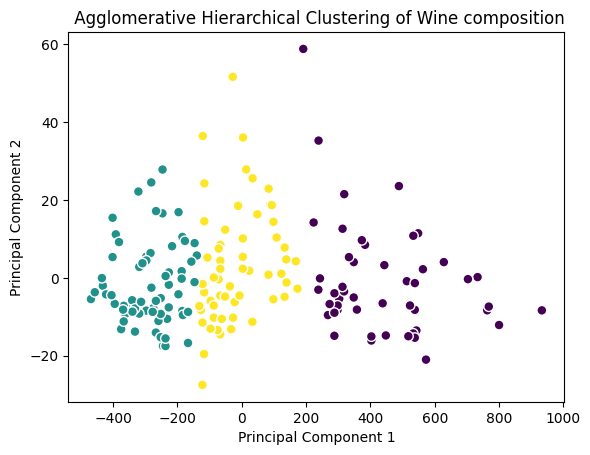

In [24]:
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=y_ahc, cmap='viridis', edgecolors='w', s=50)
plt.title(' Agglomerative Hierarchical Clustering of Wine composition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

**DB Scan***

In [25]:
from sklearn.cluster import DBSCAN


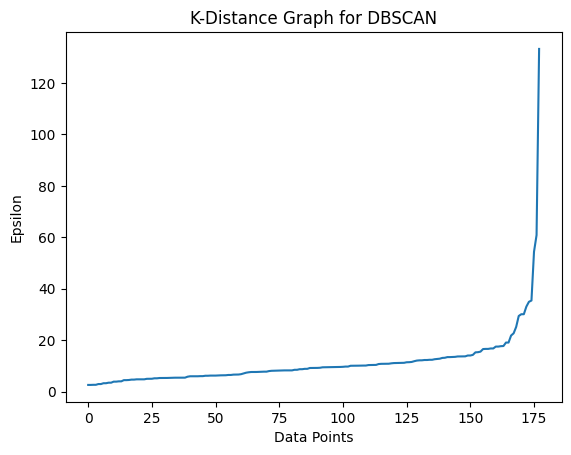

In [31]:
from sklearn.neighbors import NearestNeighbors

# Determine the optimal epsilon using Nearest Neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Plot the k-distance graph
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.title('K-Distance Graph for DBSCAN')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

In [38]:
#from graph eps = 35
db = DBSCAN(eps=35, min_samples=5).fit(X)
db

DBSCAN(eps=35)

In [39]:
dbscan_labels = db.fit_predict(X)
dbscan_labels

array([ 0,  0, -1, -1,  1, -1,  2,  2,  0,  0, -1,  2,  2,  0, -1,  2,  2,
        0, -1,  3,  1,  1,  0,  0,  3,  3, -1,  2,  3,  0,  2, -1,  0,  2,
        0,  3,  3,  0,  0,  1,  1,  0,  0,  1,  3,  0,  0,  0,  0,  2,  0,
        2, -1, -1,  0,  0,  0,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  3,  1,  1, -1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  3,  1])

In [28]:
len(set(dbscan_labels))

5

**In DBSCAN 4 clusters are obtained, where -1 is noise**

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(X,dbscan_labels)

0.4413295944891925

Text(0.5, 1.0, 'DBSCAN Clustering')

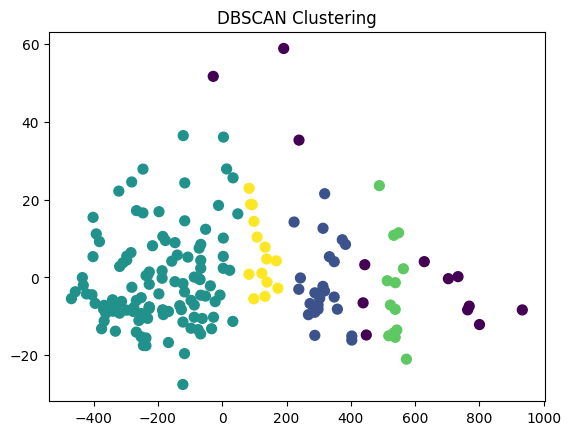

In [30]:
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')

**Since KMeans clustering gives the best silhoutte score among all the techniques done,it is considered as the best algorithm for this particular dataset**

**Hence optimum number of clusters = 3**
